### Aufgabe 1

Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Load Titanic Dataset

In [2]:
df = pd.read_csv('titanic.csv')

Show First 5 Rows

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dropping bad columns

In [4]:
df.drop("PassengerId", axis=1, inplace=True)
df.drop("Ticket", axis=1, inplace=True)
df.drop("Name", axis=1, inplace=True)

Describe Dataset

In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Show Dtypes

In [6]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

Show How many Null Values

In [7]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df.drop("Cabin", axis=1, inplace=True)

Fix Age

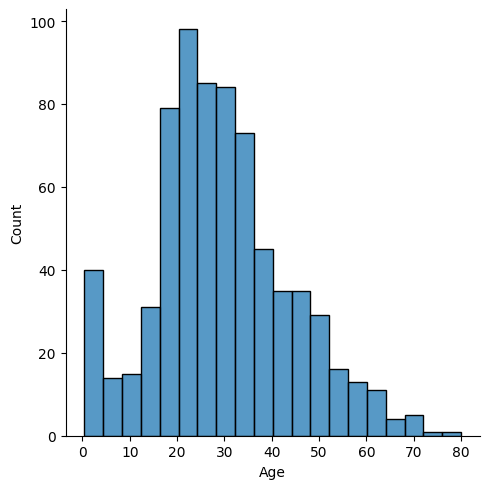

In [9]:
sns.displot(df['Age'])

In [10]:
df['Age']=df['Age'].fillna(df['Age'].mean())

Fix Embarked

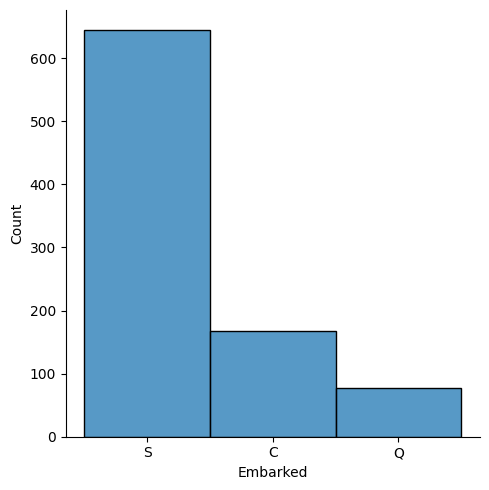

In [11]:
sns.displot(df['Embarked'])

In [12]:
df['Embarked']=df['Embarked'].fillna("S")

All Variables Fixed

In [13]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Dataset Strings etc to numbers

In [14]:
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

Explorative Data Anaysis

<Axes: title={'center': 'Pearson Correlation of Features'}>

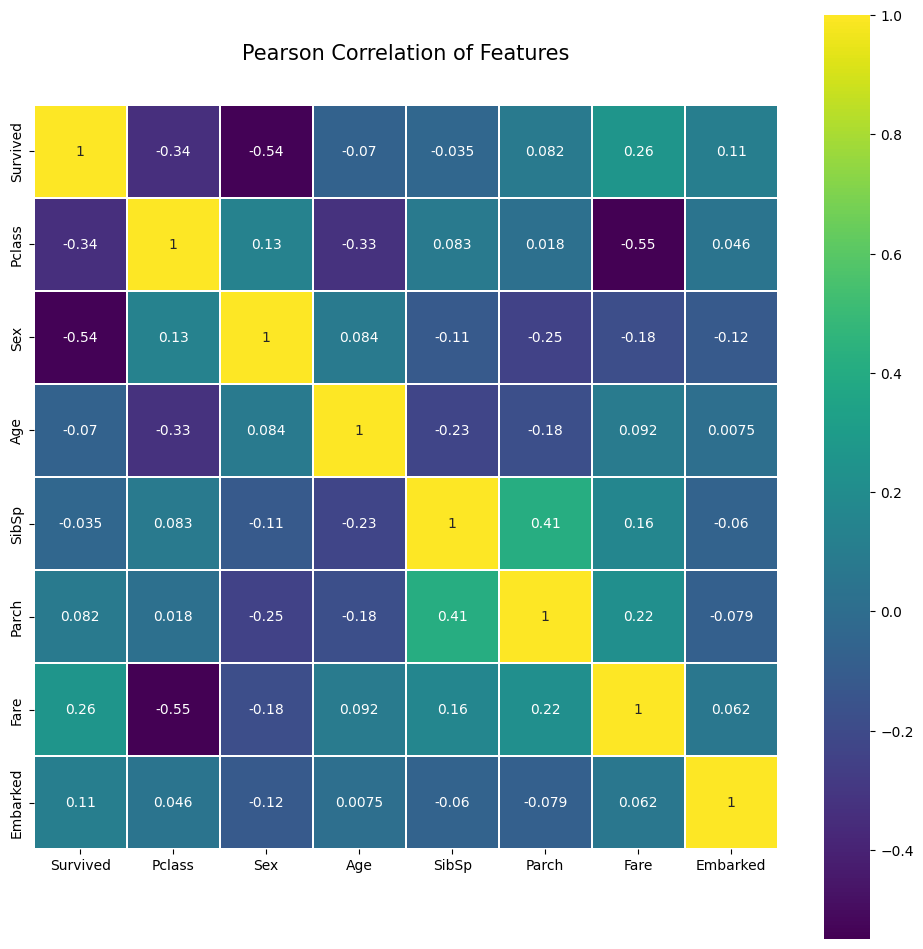

In [15]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [16]:
df_eda = df.copy()

In [17]:
df_eda.drop("Embarked", axis=1, inplace=True)
df_eda.drop("Parch", axis=1, inplace=True)
df_eda.drop("SibSp", axis=1, inplace=True)
df_eda.drop("Age", axis=1, inplace=True)
df_eda.drop("Fare", axis=1, inplace=True)

### Aufgabe 2 & 3

Training Tree with Full Data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
random_seed = 42

In [20]:
train, test = train_test_split(df, test_size=0.2, random_state=random_seed)

In [21]:
y_train = train["Survived"]
X_train = train.drop("Survived", axis=1)

y_test = test["Survived"]
X_test = test.drop("Survived", axis=1)

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import time
tree = DecisionTreeClassifier()

In [23]:
start_time = time.time()
tree.fit(X_train, y_train)
print("Training time: ", time.time() - start_time)

Training time:  0.0051708221435546875


In [24]:
tree.score(X_test, y_test)

0.7821229050279329

[Text(0.3174469394934334, 0.9772727272727273, 'Sex <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = Died'),
 Text(0.14915572232645402, 0.9318181818181818, 'Pclass <= 2.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]\nclass = Survived'),
 Text(0.2333013309099437, 0.9545454545454546, 'True  '),
 Text(0.039399624765478425, 0.8863636363636364, 'Age <= 2.5\ngini = 0.074\nsamples = 130\nvalue = [5, 125]\nclass = Survived'),
 Text(0.0150093808630394, 0.8409090909090909, 'Parch <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Died'),
 Text(0.0075046904315197, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),
 Text(0.0225140712945591, 0.7954545454545454, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Died'),
 Text(0.06378986866791744, 0.8409090909090909, 'Age <= 27.5\ngini = 0.061\nsamples = 128\nvalue = [4, 124]\nclass = Survived'),
 Text(0.0375234521575985, 0.7954545454545454, 'Age <= 24.5\ngini = 0.12\nsamples = 47\nvalue = [3.0, 4

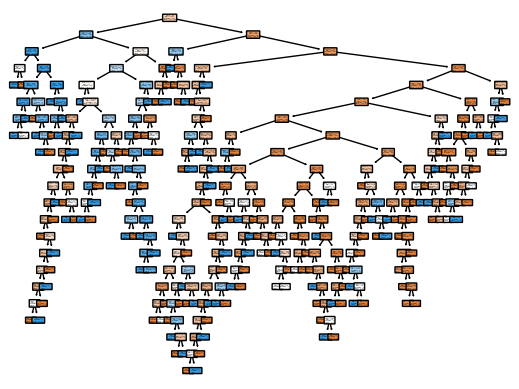

In [25]:
plot_tree(tree, filled=True, rounded=True, feature_names=X_train.columns, class_names=["Died", "Survived"])

Training Tree with selected features

In [26]:
train_eda, test_eda = train_test_split(df_eda, test_size=0.2, random_state=random_seed)

In [27]:
y_train_eda = train_eda["Survived"]
X_train_eda = train_eda.drop("Survived", axis=1)

y_test_eda = test_eda["Survived"]
X_test_eda = test_eda.drop("Survived", axis=1)

In [28]:
tree = DecisionTreeClassifier()
start_time = time.time()
tree.fit(X_train_eda, y_train_eda)
print("Training time: ", time.time() - start_time)
tree.score(X_test_eda, y_test_eda)

Training time:  0.0013873577117919922


0.7653631284916201

[Text(0.5, 0.875, 'Sex <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = Died'),
 Text(0.3, 0.625, 'Pclass <= 2.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]\nclass = Survived'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'Pclass <= 1.5\ngini = 0.074\nsamples = 130\nvalue = [5, 125]\nclass = Survived'),
 Text(0.1, 0.125, 'gini = 0.082\nsamples = 70\nvalue = [3, 67]\nclass = Survived'),
 Text(0.3, 0.125, 'gini = 0.064\nsamples = 60\nvalue = [2, 58]\nclass = Survived'),
 Text(0.4, 0.375, 'gini = 0.5\nsamples = 115\nvalue = [59.0, 56.0]\nclass = Died'),
 Text(0.7, 0.625, 'Pclass <= 1.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]\nclass = Died'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'gini = 0.451\nsamples = 93\nvalue = [61, 32]\nclass = Died'),
 Text(0.8, 0.375, 'Pclass <= 2.5\ngini = 0.251\nsamples = 374\nvalue = [319, 55]\nclass = Died'),
 Text(0.7, 0.125, 'gini = 0.275\nsamples = 91\nvalue = [76, 15]\nclass = Died'),
 Text(0.9, 0.125, 'gini = 0.243\ns

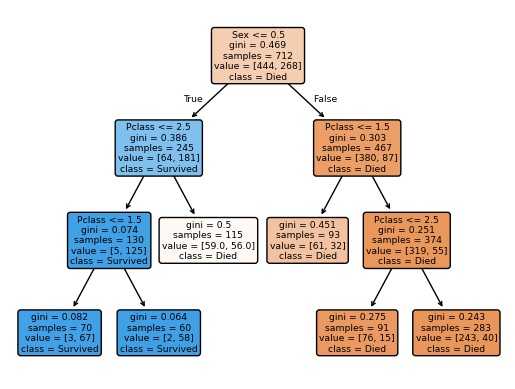

In [29]:
plot_tree(tree, filled=True, rounded=True, feature_names=X_train_eda.columns, class_names=["Died", "Survived"])

### Aufgabe 4

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
criterion_list = ["gini", "entropy", "log_loss"]
splitter_list = ["best", "random"]
max_depth_list = [None, 3, 5, 10]
min_samples_split_list = [2, 5, 10]
min_samples_leaf_list = [1, 2, 4]

In [32]:
param_grid = {
    'criterion': criterion_list,
    'splitter': splitter_list,
    'max_depth': max_depth_list,
    'min_samples_split': min_samples_split_list,
    'min_samples_leaf': min_samples_leaf_list
}

In [33]:
tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree, param_grid)

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [35]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
0.8230079779375554


[Text(0.5, 0.875, 'Sex <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = Died'),
 Text(0.25, 0.625, 'Pclass <= 2.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]\nclass = Survived'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Age <= 2.5\ngini = 0.074\nsamples = 130\nvalue = [5, 125]\nclass = Survived'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Died'),
 Text(0.1875, 0.125, 'gini = 0.061\nsamples = 128\nvalue = [4, 124]\nclass = Survived'),
 Text(0.375, 0.375, 'Fare <= 23.35\ngini = 0.5\nsamples = 115\nvalue = [59.0, 56.0]\nclass = Died'),
 Text(0.3125, 0.125, 'gini = 0.486\nsamples = 94\nvalue = [39, 55]\nclass = Survived'),
 Text(0.4375, 0.125, 'gini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = Died'),
 Text(0.75, 0.625, 'Age <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]\nclass = Died'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'SibSp <= 2.5\ngini = 0.434\nsamples = 22\nvalue = [7.0, 15.0]\nclass = Survived'),


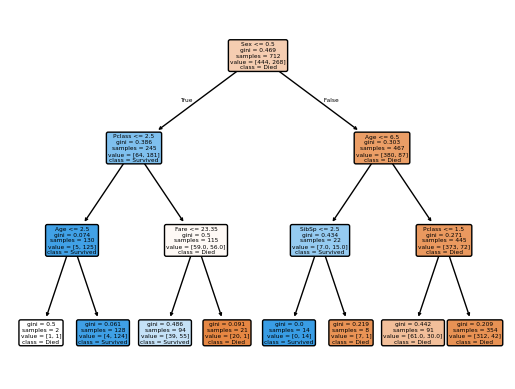

In [39]:
plot_tree(grid_search.best_estimator_, filled=True, rounded=True, feature_names=X_train.columns, class_names=["Died", "Survived"])

EDA

In [40]:
tree = DecisionTreeClassifier()
grid_search_eda = GridSearchCV(tree, param_grid)

In [41]:
grid_search_eda.fit(X_train_eda, y_train_eda)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [42]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}
0.8230079779375554


[Text(0.5, 0.875, 'Sex <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]\nclass = Died'),
 Text(0.3, 0.625, 'Pclass <= 2.5\ngini = 0.386\nsamples = 245\nvalue = [64, 181]\nclass = Survived'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'Pclass <= 1.5\ngini = 0.074\nsamples = 130\nvalue = [5, 125]\nclass = Survived'),
 Text(0.1, 0.125, 'gini = 0.082\nsamples = 70\nvalue = [3, 67]\nclass = Survived'),
 Text(0.3, 0.125, 'gini = 0.064\nsamples = 60\nvalue = [2, 58]\nclass = Survived'),
 Text(0.4, 0.375, 'gini = 0.5\nsamples = 115\nvalue = [59.0, 56.0]\nclass = Died'),
 Text(0.7, 0.625, 'Pclass <= 1.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]\nclass = Died'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'gini = 0.451\nsamples = 93\nvalue = [61, 32]\nclass = Died'),
 Text(0.8, 0.375, 'Pclass <= 2.5\ngini = 0.251\nsamples = 374\nvalue = [319, 55]\nclass = Died'),
 Text(0.7, 0.125, 'gini = 0.275\nsamples = 91\nvalue = [76, 15]\nclass = Died'),
 Text(0.9, 0.125, 'gini = 0.243\ns

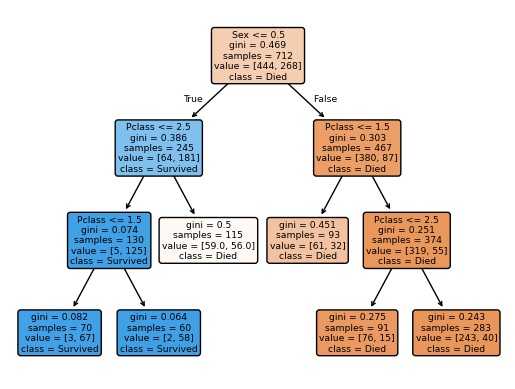

In [43]:
plot_tree(grid_search_eda.best_estimator_, filled=True, rounded=True, feature_names=X_train.columns, class_names=["Died", "Survived"])